# Bitcoin Prediction

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 


from plotly import tools
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import gc

import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\vrnsi\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\vrnsi\anaconda3\lib\site-packages\numpy\.libs\libopenblas.fb5ae2tyxyh2ijrdkgdgq3xbklktf43h.gfortran-win_amd64.dll
C:\Users\vrnsi\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
import datetime, pytz

def dateparse (time_in_secs):    
    return pytz.utc.localize(datetime.datetime.fromtimestamp(float(time_in_secs)))

data = pd.read_csv('coinbaseUSD_1-min_data_2014-12-01_to_2018-11-11.csv', parse_dates=[0], date_parser=dateparse)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016354 entries, 0 to 2016353
Data columns (total 8 columns):
 #   Column             Dtype              
---  ------             -----              
 0   Timestamp          datetime64[ns, UTC]
 1   Open               float64            
 2   High               float64            
 3   Low                float64            
 4   Close              float64            
 5   Volume_(BTC)       float64            
 6   Volume_(Currency)  float64            
 7   Weighted_Price     float64            
dtypes: datetime64[ns, UTC](1), float64(7)
memory usage: 123.1 MB


In [4]:
data.shape

(2016354, 8)

In [5]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head()

,Total,Percent
Weighted_Price,108957,0.054037
Volume_(Currency),108957,0.054037
Volume_(BTC),108957,0.054037
Close,108957,0.054037
Low,108957,0.054037


<Figure size 1440x288 with 0 Axes>

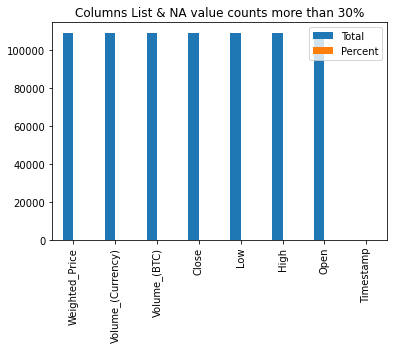

In [6]:
plt.figure(figsize=(20,4))
missing.plot(kind="bar")
plt.title('Columns List & NA value counts more than 30%')
plt.show()

In [7]:
data['Volume_(BTC)'].fillna(value=0, inplace=True)
data['Volume_(Currency)'].fillna(value=0, inplace=True)
data['Weighted_Price'].fillna(value=0, inplace=True)

In [8]:
data['Open'].fillna(method='ffill', inplace=True)
data['High'].fillna(method='ffill', inplace=True)
data['Low'].fillna(method='ffill', inplace=True)
data['Close'].fillna(method='ffill', inplace=True)

data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2014-12-01 05:33:00+00:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0
1,2014-12-01 05:34:00+00:00,300.0,300.0,300.0,300.0,0.00,0.0,0.0
2,2014-12-01 05:35:00+00:00,300.0,300.0,300.0,300.0,0.00,0.0,0.0
3,2014-12-01 05:36:00+00:00,300.0,300.0,300.0,300.0,0.00,0.0,0.0
4,2014-12-01 05:37:00+00:00,300.0,300.0,300.0,300.0,0.00,0.0,0.0


In [9]:
# create valid date range
start = datetime.datetime(2015, 1, 1, 0, 0, 0, 0, pytz.UTC)
end = datetime.datetime(2018, 11, 11, 0, 0, 0, 0, pytz.UTC)

In [10]:
# find rows between start and end time and find the first row (00:00 monday morning)
weekly_rows = data[(data['Timestamp'] >= start) & (data['Timestamp'] <= end)].groupby([pd.Grouper(key='Timestamp', freq='W-MON')]).first().reset_index()
weekly_rows.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2015-01-12 00:00:00+00:00,360.00,360.00,360.00,360.00,0.0100,3.600000,360.00
1,2015-01-19 00:00:00+00:00,260.00,260.00,260.00,260.00,1.0000,260.000000,260.00
2,2015-01-26 00:00:00+00:00,225.51,225.51,225.51,225.51,0.0000,0.000000,0.00
3,2015-02-02 00:00:00+00:00,274.73,274.73,274.73,274.73,0.2428,66.704444,274.73
4,2015-02-09 00:00:00+00:00,237.83,237.83,237.83,237.83,0.0000,0.000000,0.00


In [11]:
# We use Plotly to create the plots https://plot.ly/python/
trace1 = go.Scatter(x = weekly_rows['Timestamp'], y = weekly_rows['Open'].astype(float), mode = 'lines', name = 'Open')
trace2 = go.Scatter(x = weekly_rows['Timestamp'], y = weekly_rows['Close'].astype(float), mode = 'lines', name = 'Close')
trace3 = go.Scatter(x = weekly_rows['Timestamp'], y = weekly_rows['Weighted_Price'].astype(float), mode = 'lines',name = 'Weighted Avg')

layout = dict(title='Historical Bitcoin Prices (2015-2018) with the Slider ', xaxis=dict(rangeselector=dict(buttons=list([
                
    #change the count to desired amount of months.
                dict(count=1, label='1m',step='month',stepmode='backward'),
                dict(count=6, label='6m',step='month',stepmode='backward'),
                dict(count=12,label='1y',step='month',stepmode='backward'),
                dict(count=36,label='3y',step='month',stepmode='backward'),
                dict(step='all')])),
        rangeslider=dict(visible = True), type='date'))

data = [trace1,trace2, trace3]
fig = dict(data=data, layout=layout)
iplot(fig, filename = "Time Series with Rangeslider")

In [12]:
trace1 = go.Scatter(x = weekly_rows['Timestamp'],y = weekly_rows['Volume_(Currency)'].astype(float),mode = 'lines',
                    name = 'Bitcoin Price (Open)')

layout = dict(title='Historical Bitcoin Volume (USD) (2015-2018) with the slider', xaxis=dict(rangeselector=dict(buttons=list([
                dict(count=1,label='1m', step='month',stepmode='backward'),
                dict(count=6,label='6m', step='month',stepmode='backward'),
                dict(count=12,label='1y',step='month',stepmode='backward'),
                dict(count=36,label='3y',step='month',stepmode='backward'),
                dict(step='all')])), rangeslider=dict(visible = True), type='date'))

data = [trace1]
fig = dict(data=data, layout=layout)
iplot(fig, filename = "Time Series with Rangeslider")

In [13]:
#BTC Volume vs USD visualization
trace = go.Scattergl(y = weekly_rows['Volume_(BTC)'].astype(float), x = weekly_rows['Weighted_Price'].astype(float), 
                     mode = 'markers',marker = dict(color = '#FFBAD2', line = dict(width = 1)))

layout = go.Layout(title='BTC Volume v/s USD', xaxis=dict(title='Weighted Price', titlefont=dict( family='Courier New, monospace',
            size=18, color='#7f7f7f')), yaxis=dict(title='Volume BTC',titlefont=dict(family='Courier New, monospace',size=18,
            color='#7f7f7f')))
data = [trace]
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='compare_webgl')

# LSTM

In [14]:
data = pd.read_csv('coinbaseUSD_1-min_data_2014-12-01_to_2018-11-11.csv',parse_dates=[0], date_parser=dateparse) 
data['Timestamp'] = data['Timestamp'].dt.tz_localize(None)
data = data.groupby([pd.Grouper(key='Timestamp', freq='H')]).first().reset_index()
data = data.set_index('Timestamp')
data = data[['Weighted_Price']]
data['Weighted_Price'].fillna(method='ffill', inplace=True)

In [15]:
split_date = '25-Jun-2018'
data_train = data.loc[data.index <= split_date].copy()
data_test = data.loc[data.index > split_date].copy()

In [16]:
# Data preprocess
training_set = data_train.values
training_set = np.reshape(training_set, (len(training_set), 1))
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))

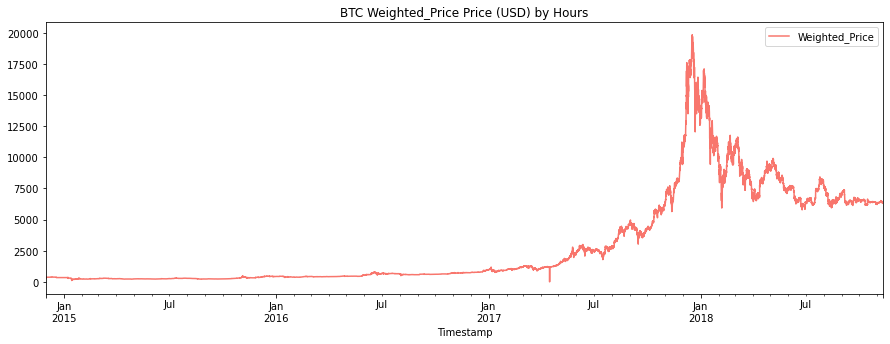

In [17]:
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
_ = data.plot(style='', figsize=(15,5), color=color_pal[0], title='BTC Weighted_Price Price (USD) by Hours')

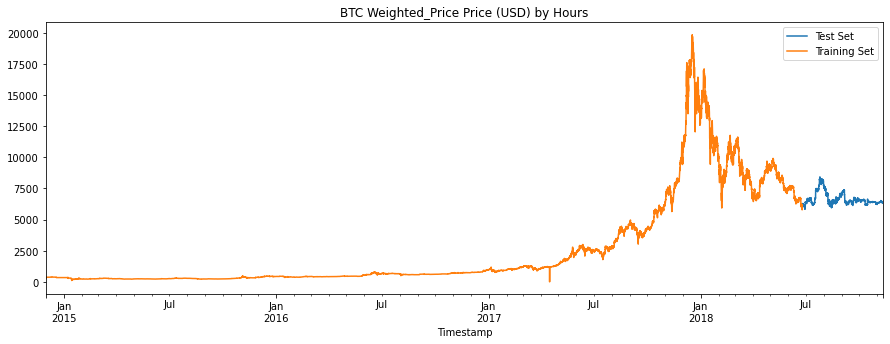

In [18]:
_ = data_test \
    .rename(columns={'Weighted_Price': 'Test Set'}) \
    .join(data_train.rename(columns={'Weighted_Price': 'Training Set'}), how='outer') \
    .plot(figsize=(15,5), title='BTC Weighted_Price Price (USD) by Hours', style='')

### Vanilla LSTM

In [19]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Activation

model = Sequential()
model.add(LSTM(128,activation="sigmoid",input_shape=(1,1)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=50, verbose=2)

Epoch 1/100
625/625 - 2s - loss: 0.0455 - 2s/epoch - 3ms/step
Epoch 2/100
625/625 - 1s - loss: 0.0155 - 906ms/epoch - 1ms/step
Epoch 3/100
625/625 - 1s - loss: 0.0079 - 938ms/epoch - 2ms/step
Epoch 4/100
625/625 - 1s - loss: 0.0050 - 881ms/epoch - 1ms/step
Epoch 5/100
625/625 - 1s - loss: 0.0038 - 869ms/epoch - 1ms/step
Epoch 6/100
625/625 - 1s - loss: 0.0030 - 946ms/epoch - 2ms/step
Epoch 7/100
625/625 - 1s - loss: 0.0024 - 957ms/epoch - 2ms/step
Epoch 8/100
625/625 - 1s - loss: 0.0021 - 918ms/epoch - 1ms/step
Epoch 9/100
625/625 - 1s - loss: 0.0018 - 883ms/epoch - 1ms/step
Epoch 10/100
625/625 - 1s - loss: 0.0016 - 871ms/epoch - 1ms/step
Epoch 11/100
625/625 - 1s - loss: 0.0014 - 888ms/epoch - 1ms/step
Epoch 12/100
625/625 - 1s - loss: 0.0013 - 881ms/epoch - 1ms/step
Epoch 13/100
625/625 - 1s - loss: 0.0011 - 898ms/epoch - 1ms/step
Epoch 14/100
625/625 - 1s - loss: 9.8327e-04 - 885ms/epoch - 1ms/step
Epoch 15/100
625/625 - 1s - loss: 8.9117e-04 - 884ms/epoch - 1ms/step
Epoch 16/100
6

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Making the predictions
test_set = data_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_BTC_price = model.predict(inputs)
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)

In [22]:
data_test['Weighted_Price_Prediction'] = predicted_BTC_price
data_all = pd.concat([data_test, data_train], sort=False)

In [23]:
#saving the predicted values in a common data frame for future comparision
final_data = data_all
final_data = final_data.reset_index()
final_data = final_data.rename(columns={'Weighted_Price_Prediction': 'lstm'})
final_data = final_data[['Timestamp','Weighted_Price','lstm']]

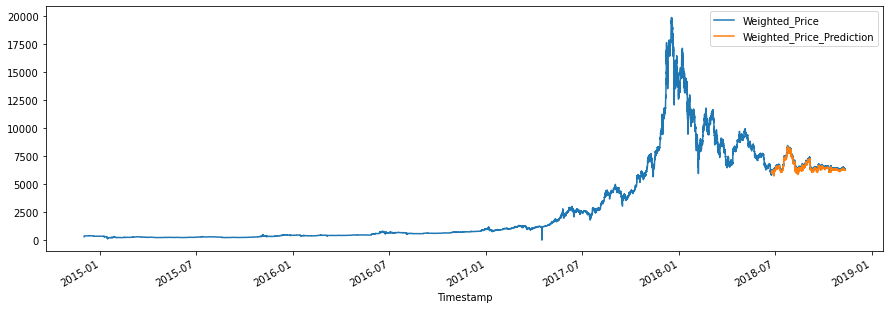

In [24]:
_ = data_all[['Weighted_Price','Weighted_Price_Prediction']].plot(figsize=(15, 5))

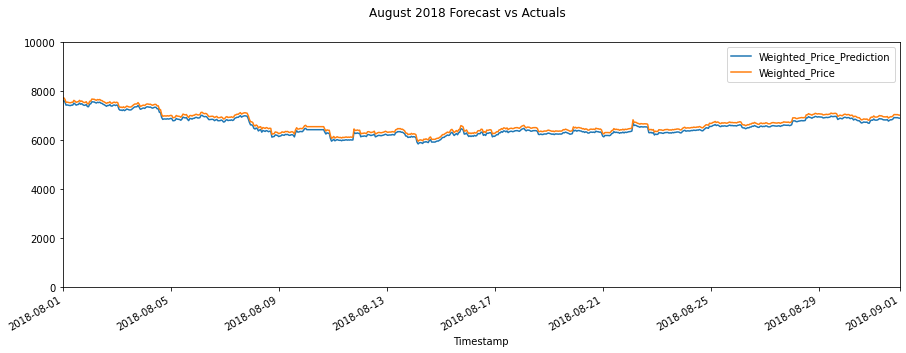

In [25]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = data_all[['Weighted_Price_Prediction','Weighted_Price']].plot(ax=ax,
                                              style=['-','-'])
ax.set_xbound(lower='08-01-2018', upper='09-01-2018')
ax.set_ylim(0, 10000)
plot = plt.suptitle('August 2018 Forecast vs Actuals')

In [26]:
#calculate MSE and MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mean_squared_error(y_true=data_test['Weighted_Price'],
                   y_pred=data_test['Weighted_Price_Prediction'])

14234.324560381852

In [27]:
mean_absolute_error(y_true=data_test['Weighted_Price'],
                   y_pred=data_test['Weighted_Price_Prediction'])

119.03009337470398

In [28]:
r2_score(y_true=data_test['Weighted_Price'],
                   y_pred=data_test['Weighted_Price_Prediction'])

0.9437170396335416

# XGBoost

In [29]:
import datetime

data = pd.read_csv('coinbaseUSD_1-min_data_2014-12-01_to_2018-11-11.csv',parse_dates=[0], date_parser=dateparse) 
data['Timestamp'] = data['Timestamp'].dt.tz_localize(None)
data = data.groupby([pd.Grouper(key='Timestamp', freq='H')]).first().reset_index()
data = data.set_index('Timestamp')
data = data[['Weighted_Price']]
data['Weighted_Price'].fillna(method='ffill', inplace=True)

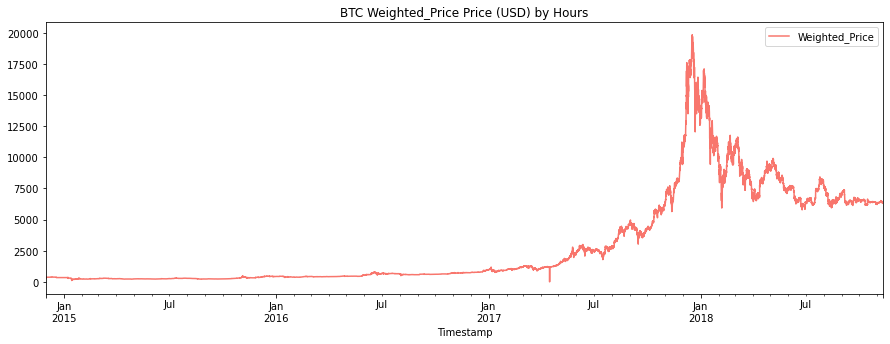

In [30]:
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
_ = data.plot(style='-', figsize=(15,5), color=color_pal, title='BTC Weighted_Price Price (USD) by Hours')

In [31]:
split_date = '25-Jun-2018'
data_train = data.loc[data.index <= split_date].copy()
data_test = data.loc[data.index > split_date].copy()

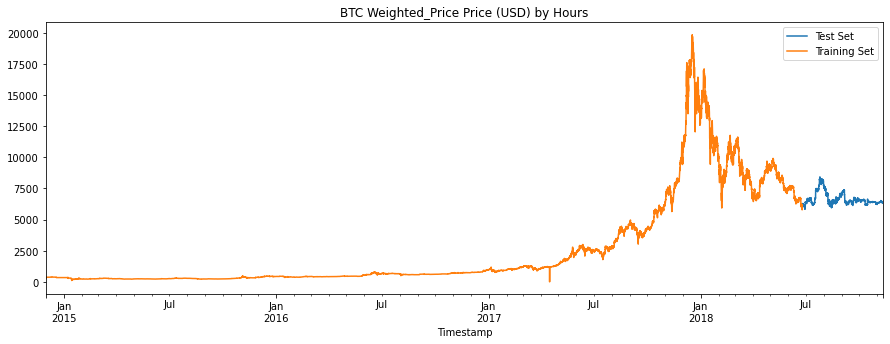

In [32]:
_ = data_test \
    .rename(columns={'Weighted_Price': 'Test Set'}) \
    .join(data_train.rename(columns={'Weighted_Price': 'Training Set'}), how='outer') \
    .plot(figsize=(15,5), title='BTC Weighted_Price Price (USD) by Hours', style='')

In [33]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

In [34]:
X_train, y_train = create_features(data_train, label='Weighted_Price')
X_test, y_test = create_features(data_test, label='Weighted_Price')

<ipython-input-33-568ff9107aea>:13: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



In [35]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree

model =  xgb.XGBRegressor(objective ='reg:linear',min_child_weight=4, booster='gbtree', colsample_bytree = 0.8, 
                          learning_rate = 0.2, max_depth = 1, alpha = 10, n_estimators = 1155)
model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], early_stopping_rounds=50, verbose=True)

[17:10:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4028.07227	validation_1-rmse:4839.92578
[1]	validation_0-rmse:3813.80786	validation_1-rmse:4468.26953
[2]	validation_0-rmse:3398.63769	validation_1-rmse:3583.10376
[3]	validation_0-rmse:3103.90869	validation_1-rmse:2878.10571
[4]	validation_0-rmse:2861.23853	validation_1-rmse:1829.14026
[5]	validation_0-rmse:2694.46289	validation_1-rmse:1029.62524
[6]	validation_0-rmse:2560.38281	validation_1-rmse:689.70624
[7]	validation_0-rmse:2470.75488	validation_1-rmse:519.63916
[8]	validation_0-rmse:2417.78271	validation_1-rmse:533.63409
[9]	validation_0-rmse:2346.35986	validation_1-rmse:693.69714
[10]	validation_0-rmse:2299.47852	validation_1-rmse:1021.36914
[11]	validation_0-rmse:2262.59595	validation_1-rmse:1195.39673
[12]	validation_0-rmse:2225.36353	validation_1-rmse:1181.75281
[13]	validation_0-

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.2, max_delta_step=0,
             max_depth=1, min_child_weight=4, missing=nan,
             monotone_constraints='()', n_estimators=1155, n_jobs=16,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=0, reg_alpha=10, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [36]:
data_test['Weighted_Price_Prediction'] = model.predict(X_test)
data_all = pd.concat([data_test, data_train], sort=False)

In [37]:
#adding to final data for comparision
final_data = pd.merge(final_data, data_all, sort=False)
final_data = final_data.rename(columns={'Weighted_Price_Prediction': 'xgboost'})
final_data = final_data[['Timestamp','Weighted_Price','lstm','xgboost']]

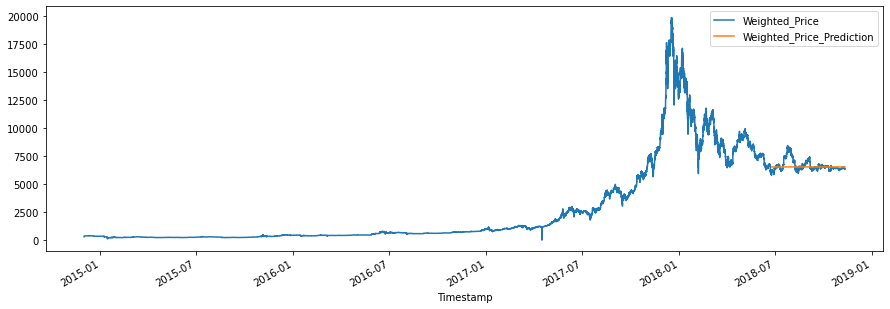

In [38]:
_ = data_all[['Weighted_Price','Weighted_Price_Prediction']].plot(figsize=(15, 5))

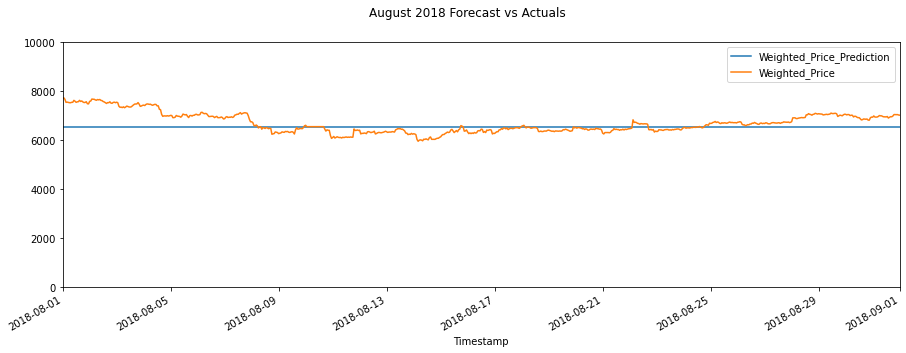

In [39]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = data_all[['Weighted_Price_Prediction','Weighted_Price']].plot(ax=ax,
                                              style=['-','-'])
ax.set_xbound(lower='08-01-2018', upper='09-01-2018')
ax.set_ylim(0, 10000)
plot = plt.suptitle('August 2018 Forecast vs Actuals')

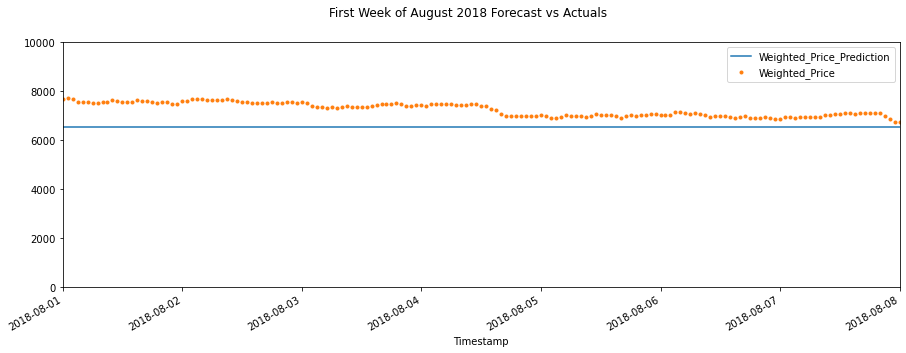

In [40]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = data_all[['Weighted_Price_Prediction','Weighted_Price']].plot(ax=ax,
                                              style=['-','.'])
ax.set_xbound(lower='08-01-2018', upper='08-08-2018')
ax.set_ylim(0, 10000)
plot = plt.suptitle('First Week of August 2018 Forecast vs Actuals')

In [41]:
mean_squared_error(y_true=data_test['Weighted_Price'],
                   y_pred=data_test['Weighted_Price_Prediction'])

270024.90396819345

In [42]:
mean_absolute_error(y_true=data_test['Weighted_Price'],
                   y_pred=data_test['Weighted_Price_Prediction'])

327.92944855948747

In [43]:
r2_score(y_true=data_test['Weighted_Price'],
                   y_pred=data_test['Weighted_Price_Prediction'])

-0.06768683709084056

# ARIMA

In [44]:
import  scipy.signal.signaltools

def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]

scipy.signal.signaltools._centered = _centered

In [45]:
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product

In [46]:
data = pd.read_csv('coinbaseUSD_1-min_data_2014-12-01_to_2018-11-11.csv',parse_dates=[0], date_parser=dateparse)

In [47]:
data['Open'].fillna(method='ffill', inplace=True)
data['High'].fillna(method='ffill', inplace=True)
data['Low'].fillna(method='ffill', inplace=True)
data['Close'].fillna(method='ffill', inplace=True)
data['Weighted_Price'].fillna(method='ffill', inplace=True)
data['Volume_(BTC)'].fillna(method='ffill', inplace=True)
data['Volume_(Currency)'].fillna(method='ffill', inplace=True)

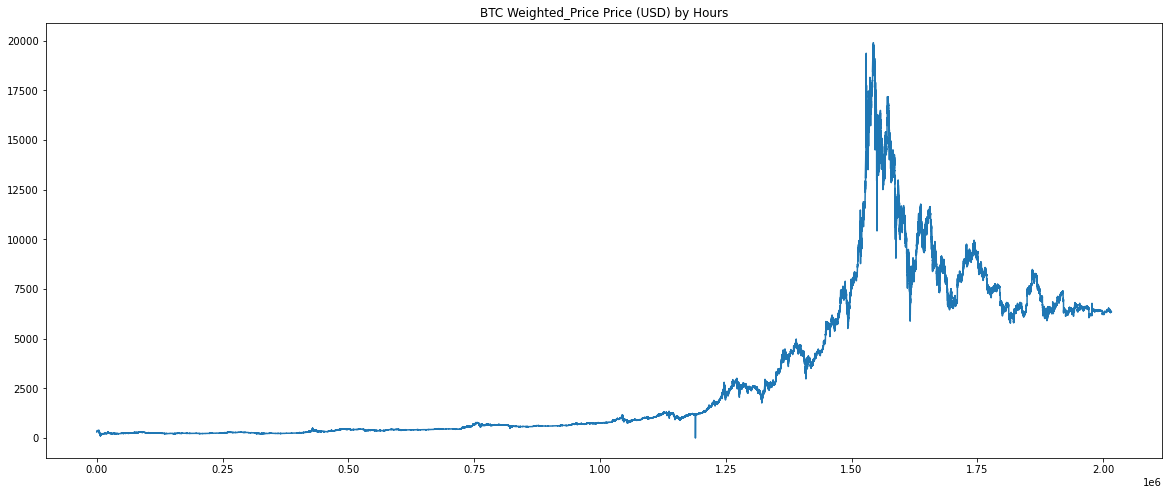

In [48]:
plt.figure(figsize=[20,8])
plt.title('BTC Weighted_Price Price (USD) by Hours')
plt.plot(data.Weighted_Price, '-', label='By Hours')

In [49]:
data['Timestamp'] = data['Timestamp'].dt.tz_localize(None)
data = data.groupby([pd.Grouper(key='Timestamp', freq='M')]).first().reset_index()
data = data.set_index('Timestamp')
data['Weighted_Price'].fillna(method='ffill', inplace=True)

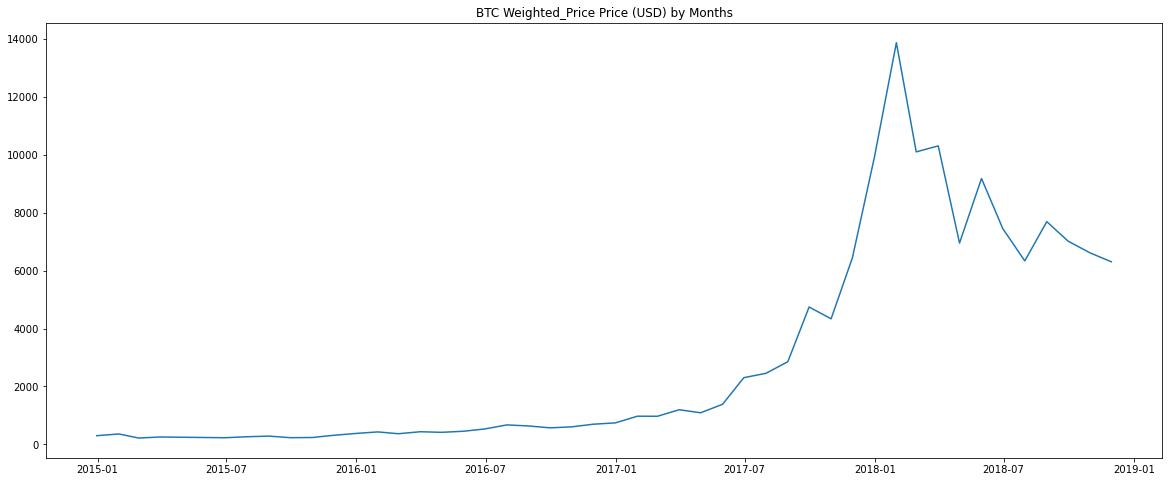

In [50]:
plt.figure(figsize=[20,8])
plt.title('BTC Weighted_Price Price (USD) by Months')
plt.plot(data.Weighted_Price, '-', label='By Months')

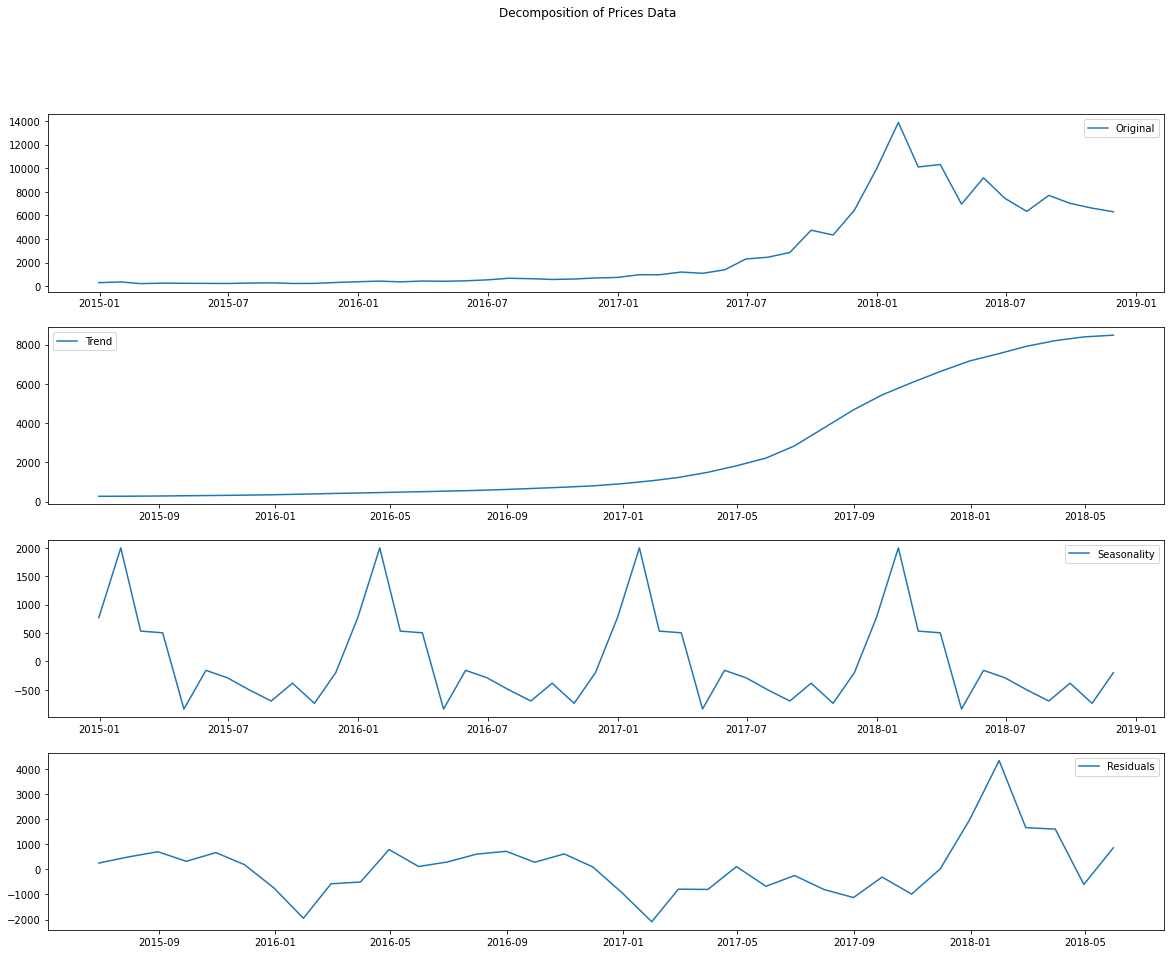

In [51]:
decomposition = sm.tsa.seasonal_decompose(data.Weighted_Price)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

fig = plt.figure(figsize=(20,15))

plt.subplot(411)
plt.plot(data.Weighted_Price, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

fig.suptitle('Decomposition of Prices Data')
plt.show()

In [52]:
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(data.Weighted_Price)[1])

Dickey–Fuller test: p=1.000000


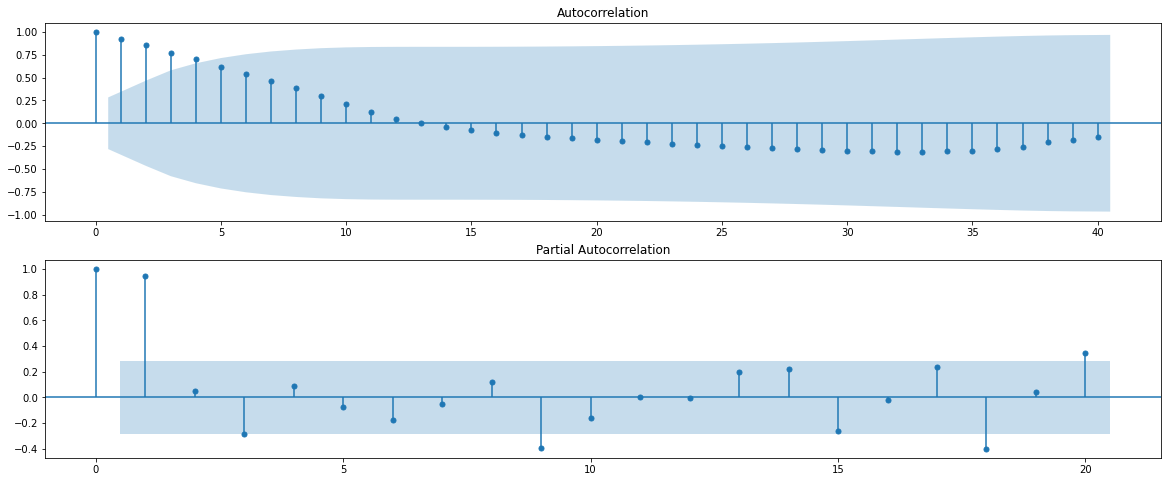

In [53]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure(figsize=(20,8))
pyplot.subplot(211)
plot_acf(data.Weighted_Price, ax=pyplot.gca(),lags=40)
pyplot.subplot(212)
plot_pacf(data.Weighted_Price, ax=pyplot.gca(), lags=20)
pyplot.show()

In [54]:
# Initial approximation of parameters
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(data.Weighted_Price, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12),enforce_stationarity=False,
                                            enforce_invertibility=False).fit(disp=-1)
    except ValueError:
        #print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [55]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

      parameters         aic
53  (2, 2, 2, 1)  156.959210
40  (2, 0, 2, 0)  163.334212
46  (2, 1, 2, 0)  164.860337
41  (2, 0, 2, 1)  165.316478
47  (2, 1, 2, 1)  165.321424
                                      SARIMAX Results                                       
Dep. Variable:                       Weighted_Price   No. Observations:                   48
Model:             SARIMAX(2, 1, 2)x(2, 1, [1], 12)   Log Likelihood                 -70.480
Date:                              Thu, 25 Aug 2022   AIC                            156.959
Time:                                      17:10:48   BIC                            158.537
Sample:                                  12-31-2014   HQIC                           153.554
                                       - 11-30-2018                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---

Dickey–Fuller test:: p=0.000000


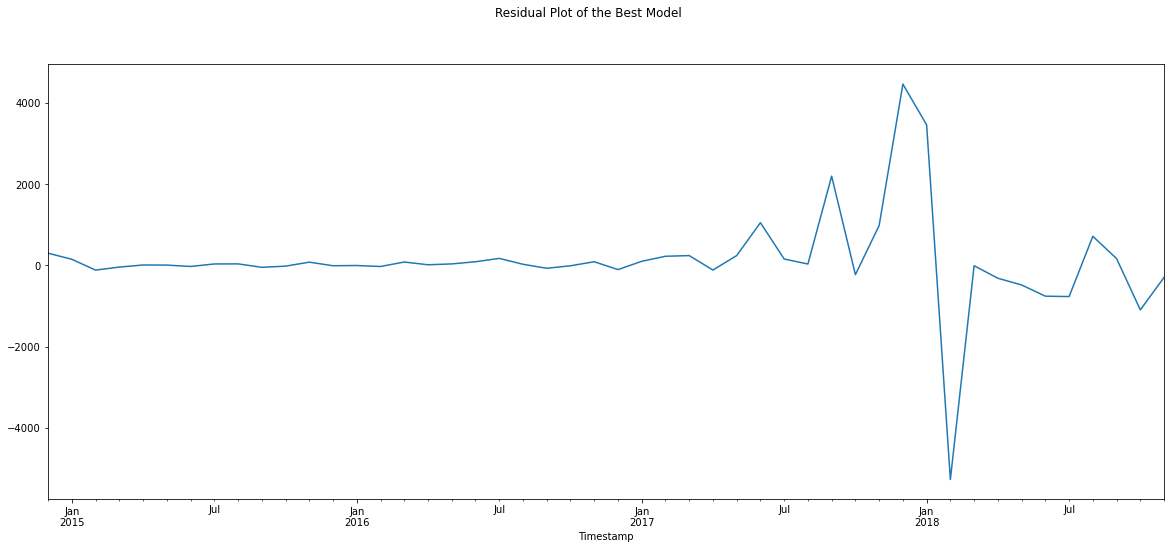

In [56]:
fig = plt.figure(figsize=(20,8))
best_model.resid.plot()
fig.suptitle('Residual Plot of the Best Model')
print("Dickey–Fuller test:: p=%f" % sm.tsa.stattools.adfuller(best_model.resid)[1])

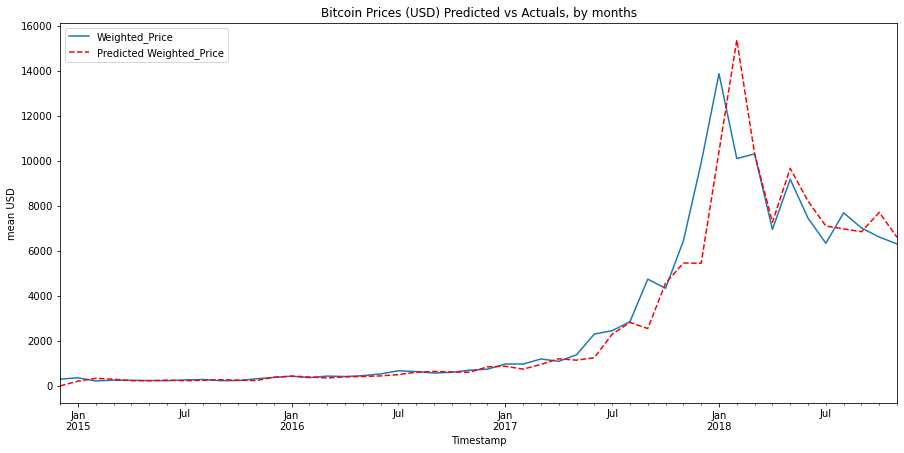

In [57]:
df_month2 = data[['Weighted_Price']]
future = pd.DataFrame()
df_month2 = pd.concat([df_month2, future])
df_month2['forecast'] = best_model.predict(start=0, end=200)
plt.figure(figsize=(15,7))
df_month2.Weighted_Price.plot()
df_month2.forecast.plot(color='r', ls='--', label='Predicted Weighted_Price')
plt.legend()
plt.title('Bitcoin Prices (USD) Predicted vs Actuals, by months')
plt.ylabel('mean USD')
plt.show()